# 1.SAT问题
* 布尔变量是值域只有两个元素0和1的变量
* 一个只由布尔变量形成的CSP问题又称为SAT问题
* 可以将SAT问题看做是一类特殊的CSP问题，不过因为SAT是一类重要的问题，在现实中和理论上有着重要的意义，因此我们将重新给出SAT问题的定义
* 用CNF描述
    * 文字：布尔变量x和布尔变量的非﹁x称为文字，前者为正文字，后者为负文字
    * 子句：$ l_1∨… ∨ l_k$ 形式的式子称为子句，其中∨是逻辑上的析取连接词， li是文字；子句也常被表示为文字的集合
    * CNF公式：$ C_1 ∧… ∧ C_m $为CNF公式，其中∧是逻辑上的合取连接词，Ci是子句；CNF公式也常被表示为子句的集合
* 赋值t：变量到{0,1}的映射
* 对于文字l： t(l) = 1 <==>
    * l为正文字x且t(x) = 1
    * l为负文字﹁x且t(x) = 0
* 对于子句C=l1∨… ∨ lk： t(C)=1<==>
    * 对于某个li有t(li) = 1
* 对于公式F= C1 ∧… ∧ Cm：t(F)=1 <==>
    * 对于所有的Ci有t(Ci) = 1

**SAT的问题描述**
给定一个CNF公式F，判定它是否存在一个赋值t，使得t(F)=1

* 重要性
    * 最早被证明是NPC问题 
    * 用于编码一些实际问题 
    * 求解规模大：完备的赛特求解办法可以求解规模很大的问题 

* 理论意义
    * 其他NPC可以转化为SAT：如果能够有效的求解SAT的问题，不必要是多项式时间，那么其他问题的问题也可以有效求解    

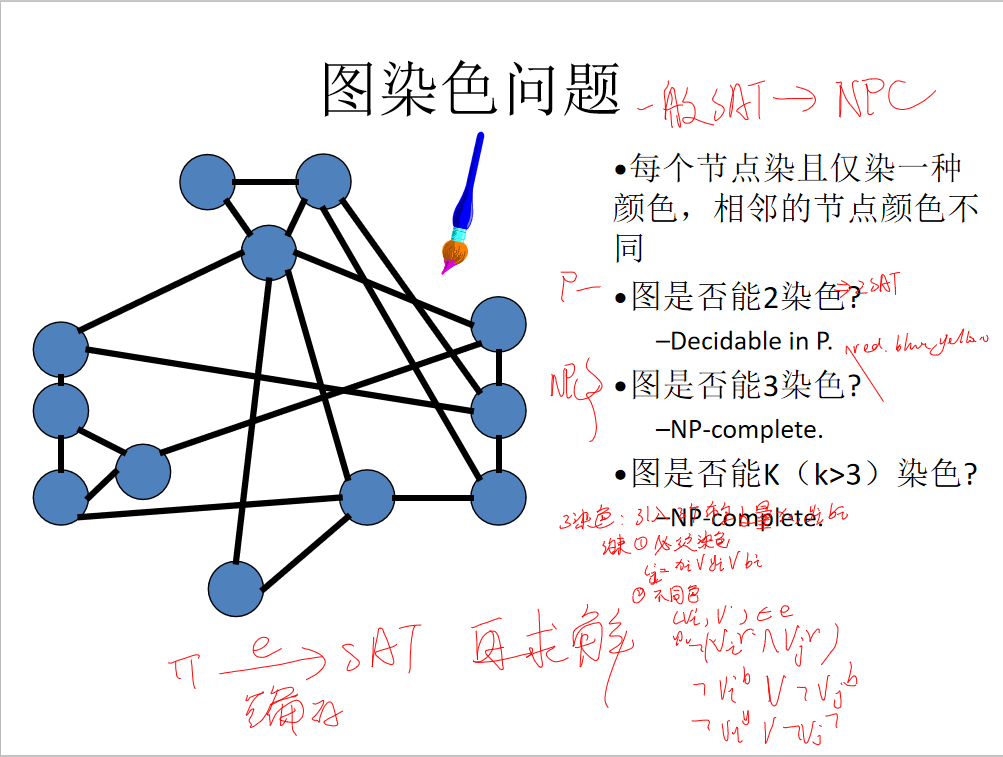

* 实践意义--SAT 问题在实践中主要应用于:
    * 验证和测试电路图案
    * 两个电路的等价性检测
    * 软件的可达性分析
    * 程序的形式验证
    * ……
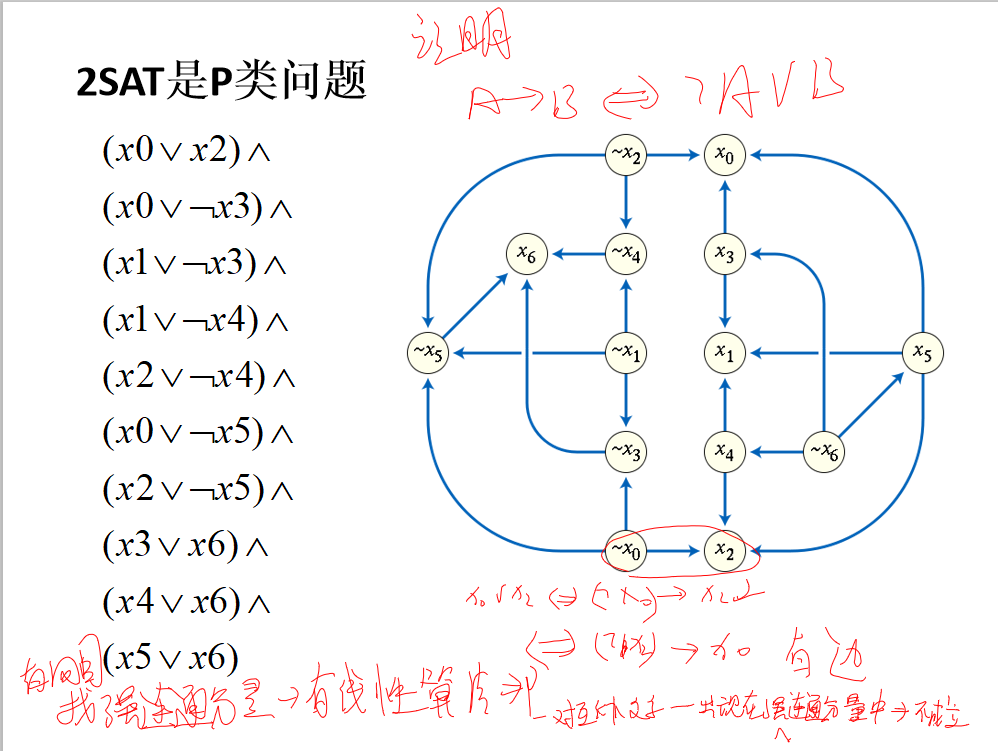  
A->B：A真，则B真




**SAT相变**
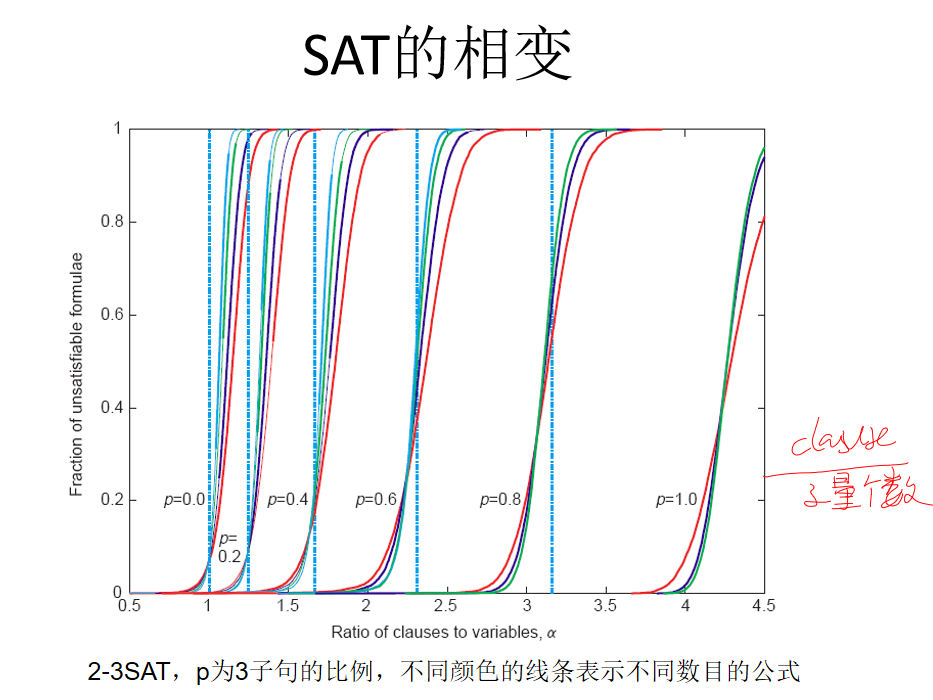
子句数目多：约束多  
变量数目多：自由度大  
一般想法：
* 变量数不变，子句数目多，则越难求解
* 子句数目不变，变量数目越多，越容易求解  

实际：如上图
纵坐标是无解的概率    
上图是一个2-3SAT混合的图   
p=3SAT/2SAT
* p=0==>2SAT
* p=1==>3SAT

存在某一相变点，无解的概率会突变
只要小的远离相变点，就算问题规模再大，也可以很容易求解

# 2.求解SAT
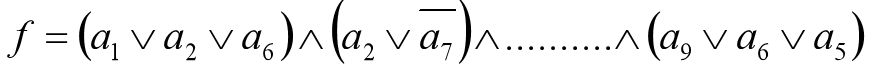
*  尝试所有可能
    * n个变量，$ 2^n $种可能
    * 指数爆炸   

---》启发式策略

**SAT求解器**
* 是算法
* 输入：CNF公式
* 输出：
    * 0：不满足
    * 1：可满足
    * （有的还能够给出满足的解或者不满足的原因
* 分类：
    * 完全求解器
        * 穷尽搜索空间 
        * 只要有足够的时间，一定能够给出答案 
        * 适用于实际应用中的问题 
    * 不完全求解器
        * 大多采用局部搜索方法 （启发式）
        * 当问题可满足时 
            * 有可能给出答案 
            * 也有可能给不出答案 
        * 当问题不可满足时 ，无法给出答案 
        * 适用于**随机产生**的cnf公式 

## 2.1 DPLL(SAT求解器
Davis-Putnam-Logemann-Loveland 算法(1960,1962).
* 大部分的现有确定性求解器都是基于 DPLL 算法
* 它提供了一个结构化的方法来枚举可能的赋值。
* Chronological backtracking（按时间顺序的回溯法）  

最新的一些途径：
* Conflict analysis 
* Lemma learning
* Non-chronological backtracking


## 2.1.1 朴素版本——回溯搜索
* 基本思想：每次选中一个未被赋值的变量进行赋值 ，然后判断该赋值是否满足整个公式 
    * 满足 ：结束搜索 
    * 处理冲突 （某个子句为0）：回溯
    * 否则：对下个变量进行赋值 
* 回溯搜索+BCP(布尔约束传递）
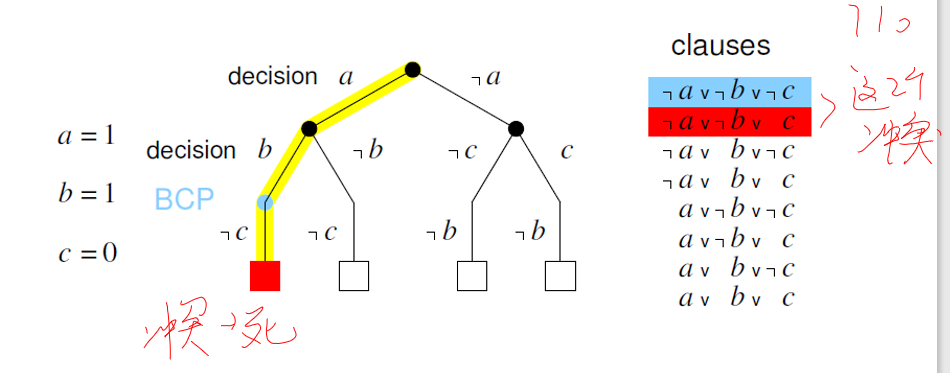

#### 例2 
* f = a (b + c + d) (b’ + c) (b’ + d) (x’ + y’) (x + z’) (x’ + b’ + y) (x + b’ + z) (c + d + y’ + z’).
    * +：∨析取
    * 乘：合取
    * a--单子句
    * 令单子句为1
    * b':b的非
* a=1
    * f = (b + c + d) (b’ + c) (b’ + d) (x’ + y’) (x + z’) (x’ + b’ + y) (x + b’ + z) (c + d + y’ + z’).
    * 决策分支b=1
        * (b + c + d)=1所以省略
        * f = c d (x’ + y’) (x + z’) (x’ + y) (x + z) (c + d + y’ + z’).
        * c = 1, d = 1.
            * f = (x’ + y’) (x + z’) (x’ + y) (x + z).
            * 决策变量: x = 1.
                * f = y’ y .
                * 冲突---回溯到x
            * x=0
                * f=z'z
                * 冲突--再回溯，x已经没有其他分支，回溯到b
    * b=0
        * f=(c+d)(x'+y')(x+z')(c+d+y'+z')
        * 令x=1
            * f=(c+d)(x'+y')(c+d+y'+z')
            * 令y=0
                * f=(c+d)
                * 令c=1
                    * f=1(可满足）

### 2.1.2 DPLL现代版本（conflict-driven clause learning)——CDCL
* decide-next-branch() 
    * 选择一个没有被赋值的变量，并给定一个赋值
* deduce() – 单元值传播（unit propagation）: 
    * 如果有一个没有赋值的变量，给它一个赋值，从这个赋值出发做BCP (Boolean Constraint Propagation).
    * BCP 反复的应用单子句规则（当有一个子句变成单子句的时候触发）
    * BCP 也可能应用其它的规则
    * 如果没有发现冲突，选择下一个没有被赋值的变量；反之，回溯。
* analyze-conflict() 
    * 找出导致冲突（一个变量既被赋值为真又被赋值为假 ）的原因，并添加一些新的子句来约束后面的搜索。
* backtrack()
    * 回溯，取消一些赋值和他们诱导出的赋值。

* 算法Sat_solve():
    * if preprocess()==冲突
        * return false不满足
    * while true:
        * if !decide-next-branch() 
            * return SAT 满足
        * while(deduce()==冲突）：
            * blevel=analyze-conflict()(返回回溯到哪一级）
            * if blevel=0（所有的分支都回溯完了
                * return UNSAT(不满足
            * baktrack(blevel)
            
* 优化BCP
    * BCP占据了求解的大量时间（80%）
    * BCP没必要检查所有的子句是否变成了单子句
    * 每一个字句选一则两个文字作为观察文字（watching literals)，仅当有一个观察文字时为假时，这个字句才有可能变成单字句 
        * 一个赋值（x=1),仅可能将包含x'的子句变成单子句
        * 类似的对（x=0)也成立
        * --》需要一个高效的数据结构

* 启发式的分支搜索策略
    * 分支决策变量的选取 -->显著的影响了搜索数的深度 
        * 选择出现**频繁的文字**
    * 搜索应该局部化 
        * 冲突分析后，应该选择那些**导致冲突的文字作为决策文字**
    * 计数器：每一个变量都应分配一个计数器 ，子句中出现一次变量，就+1 。选择数量最多的变量作为决策变量。
        * 由于冲突分析会引入lemma子句加入，这个策略会使得搜索倾向于局部化 
        

#### 蕴含图---找到引起冲突的文字
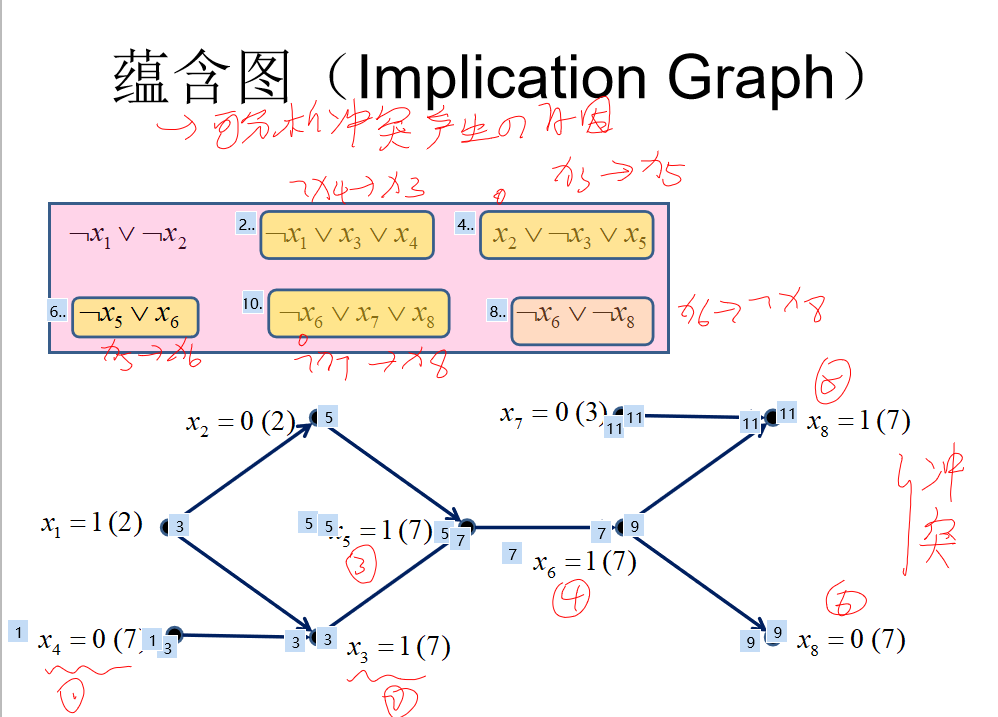
x1、x7是选的   
决策深度--也是选的，只要递增而且一层的一致就好  

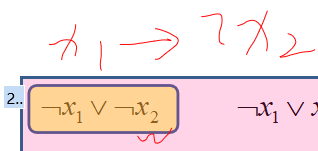

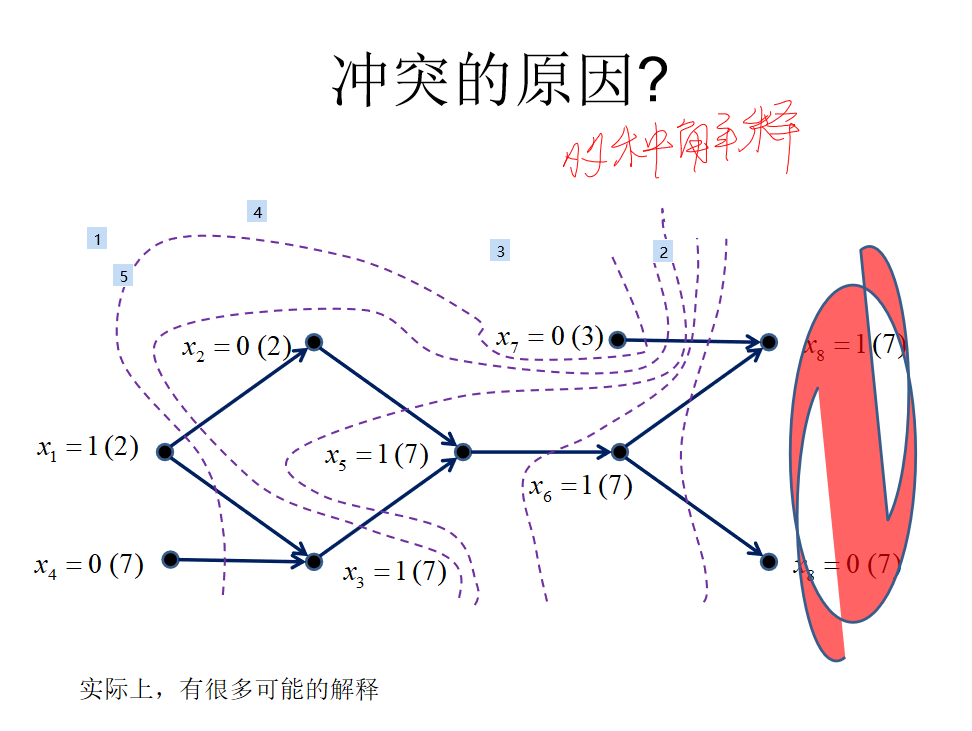  
可以有多重解释（分割）  
一般选取离冲突最近的   


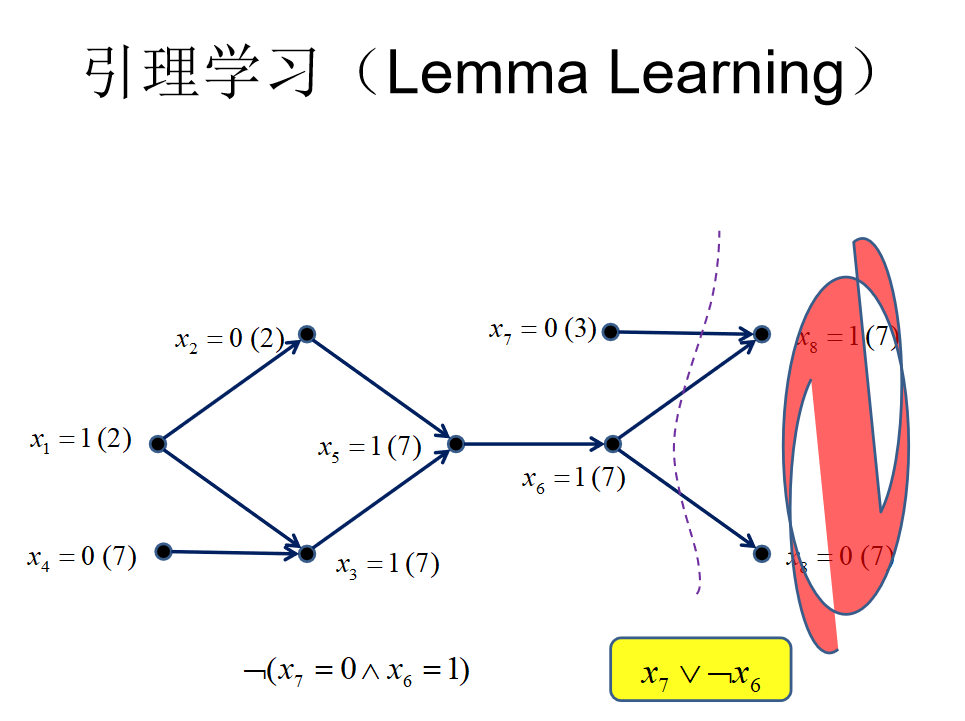
将图中的子句一起加进去来求解

#### UIP(Unique Implication Points （UIP）)
* 候选的冲突解释通常含有当前层的一个以上文字
* 通常关注那些只含有当前层一个文字的解释
* UIP = 当前决策层上，决策变量到冲突的路径都经过的点
* 含有UIP的解释可能有多个，标准的做法是采用含有离冲突最近的UIP (1st UIP) 的解释。——因为更简短
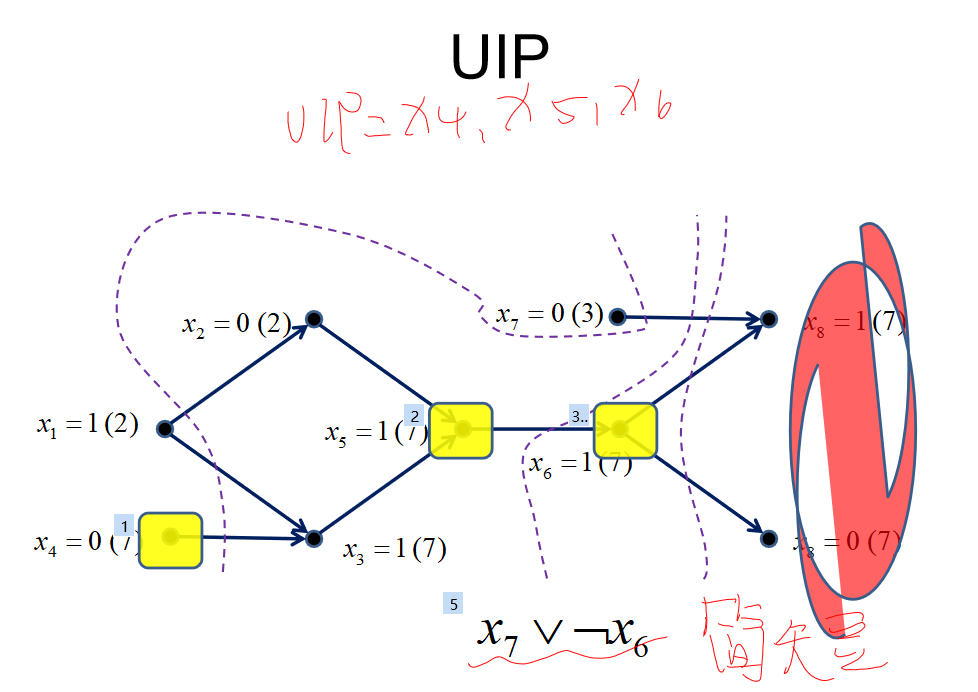

**非时序回溯（non-chronological backtracking)**
* 根据学习到的引理，可以进行非时序回溯
* 断言式子句（asserting clauses)：因为UIP产生的引理只含有当前层的1个文字
* 回溯层次：除当前层的最高层
* 根据断言子句中当前层的文字进行分支
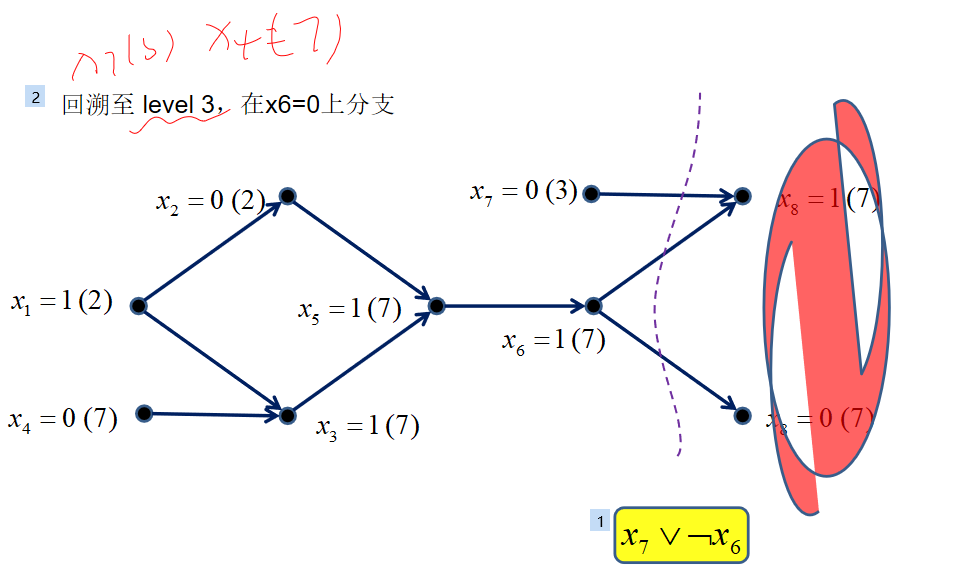

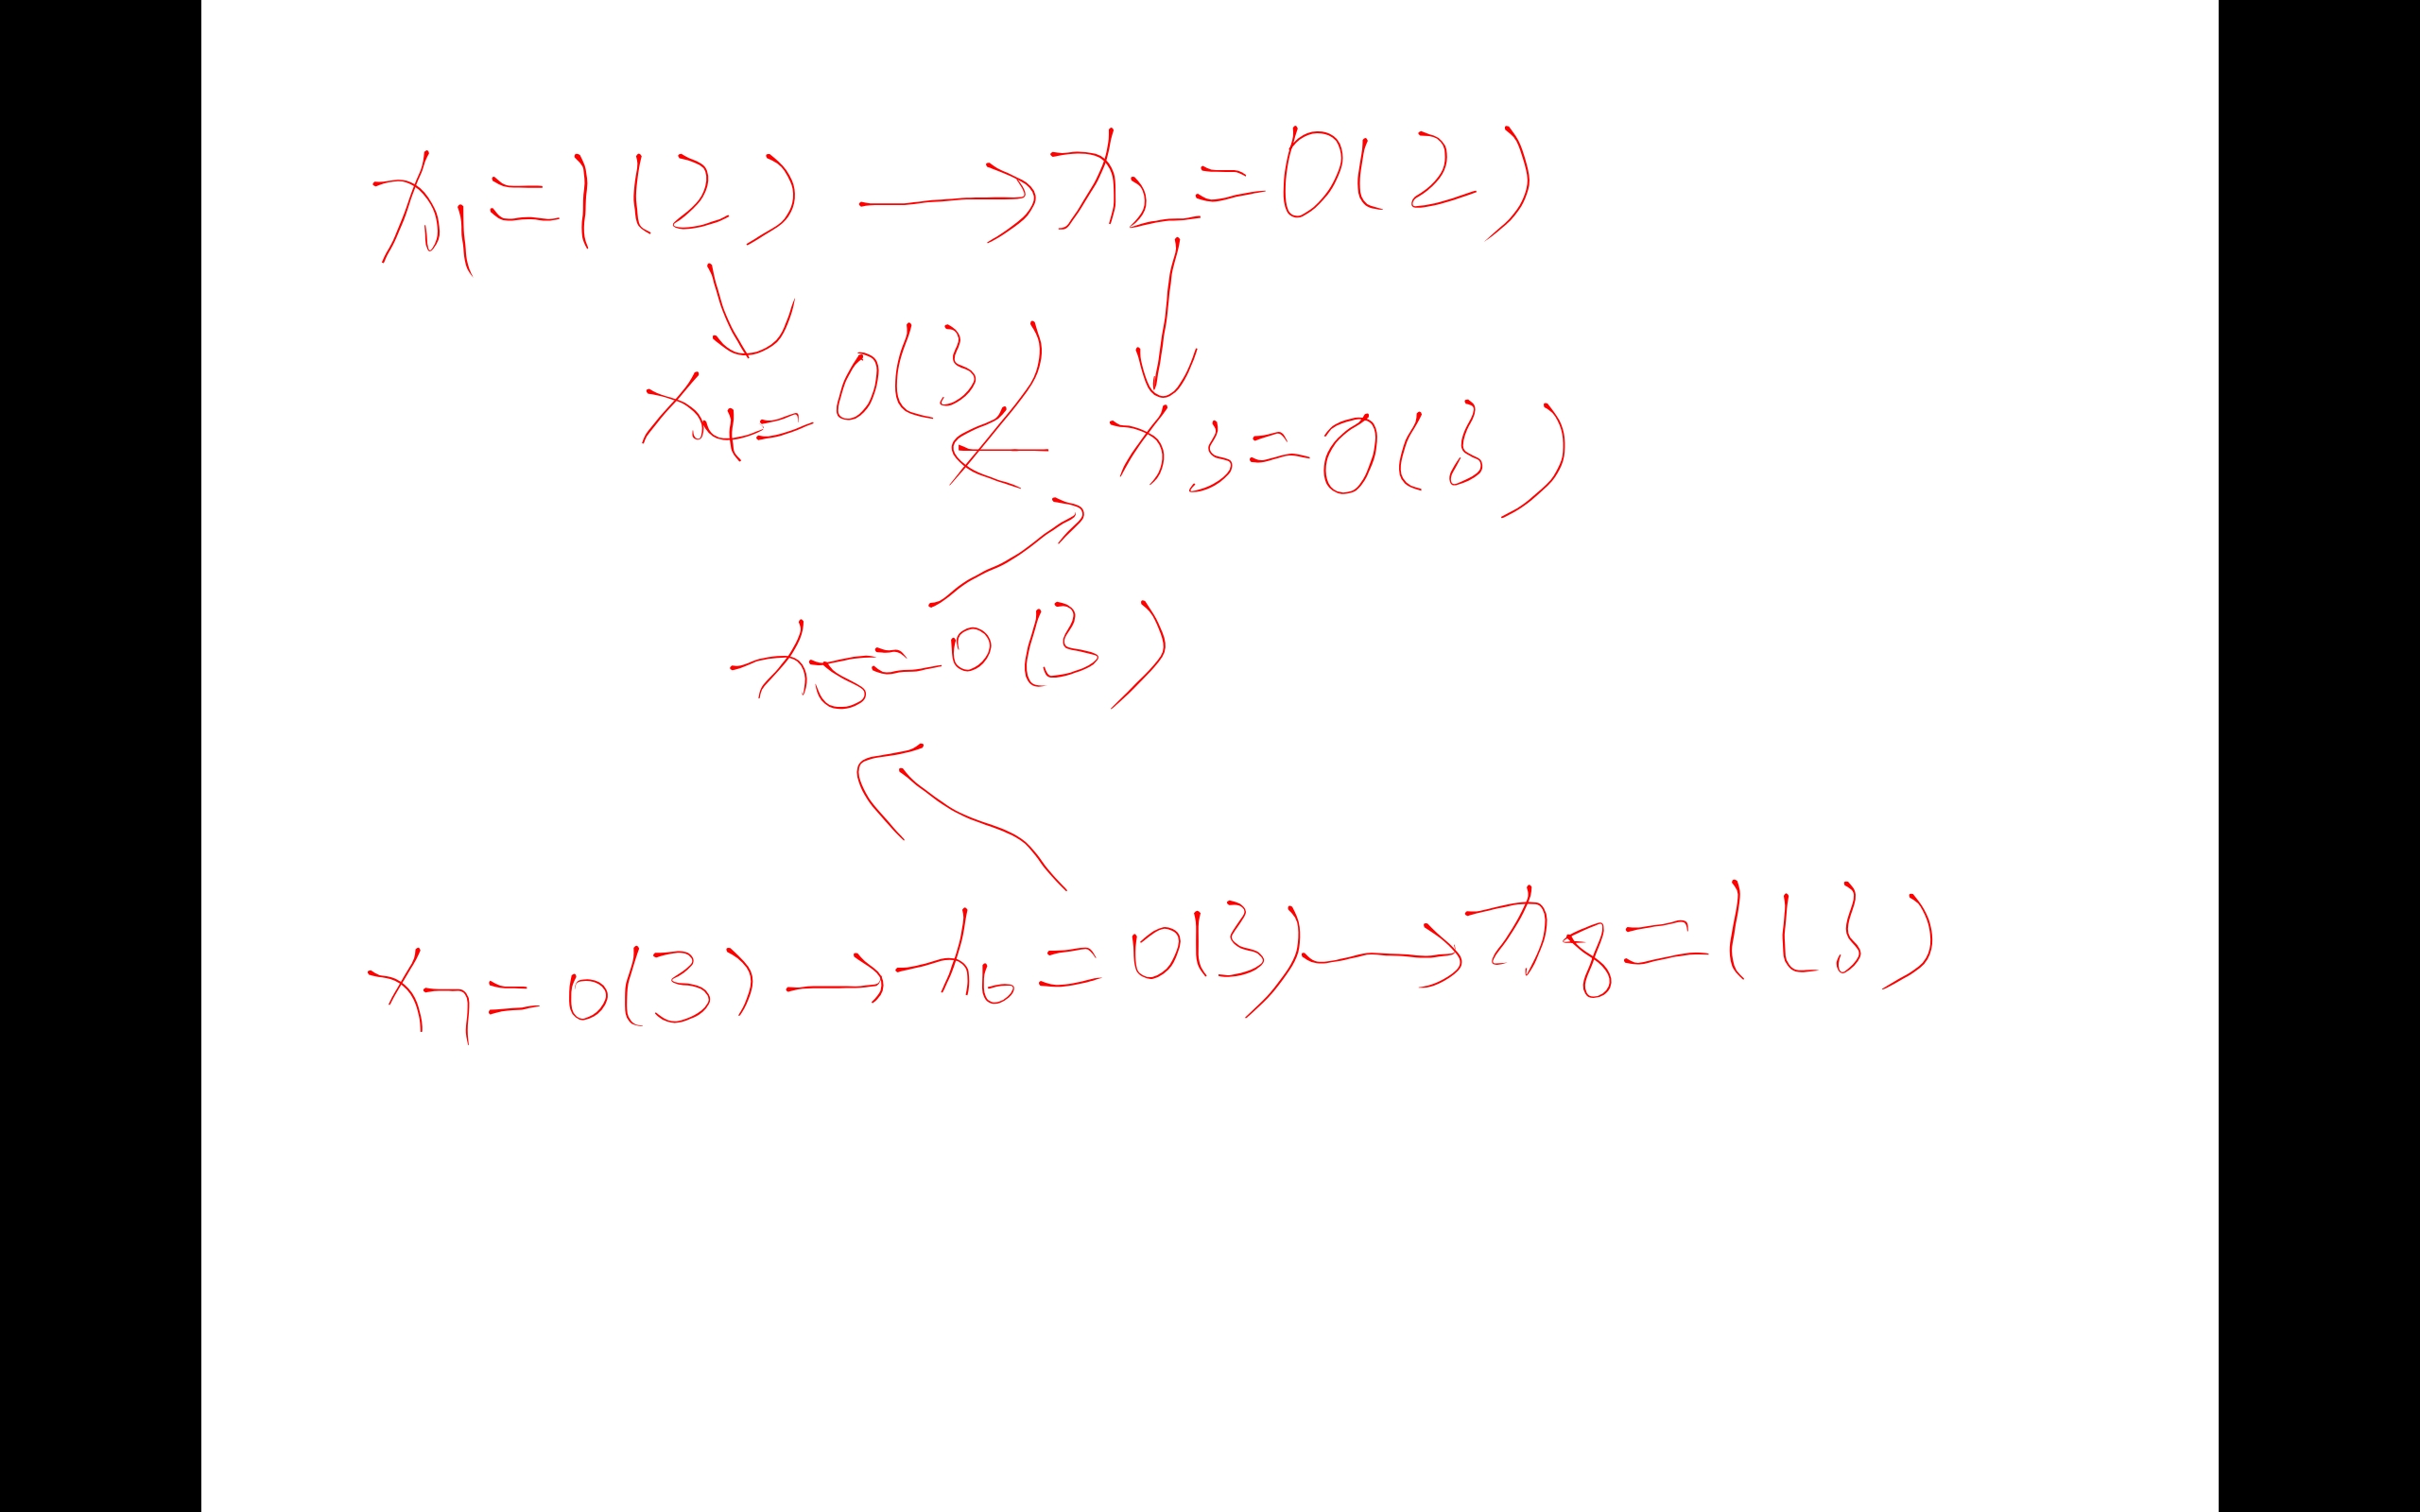

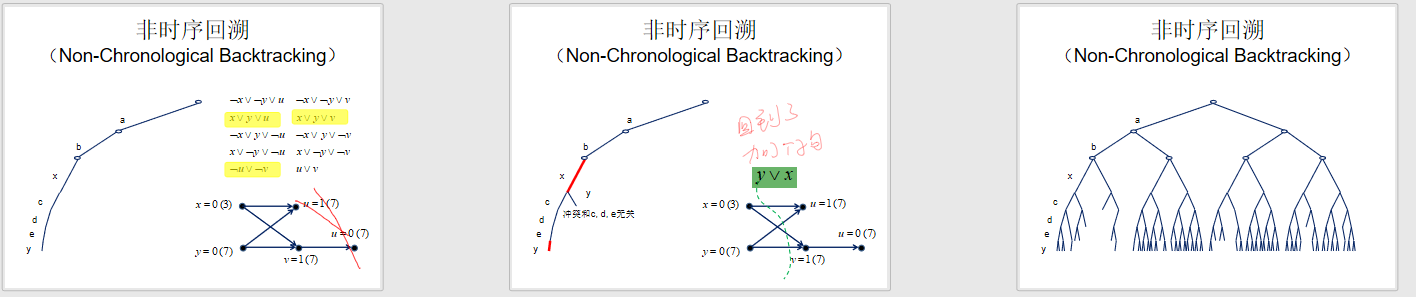

**Limiting Learned Clauses**
* 保留较短的子句（较少的文字）
* 仅保留最靠近冲突的UIP lemma
* 周期性的舍弃一部分lemma
    * 用活跃性统计来保留最有用的子句 [minisat 1.2]


# 3 MAXSAT
* MaxSAT: 寻找赋值t，使得被满足的子句数目最多。
* E.g 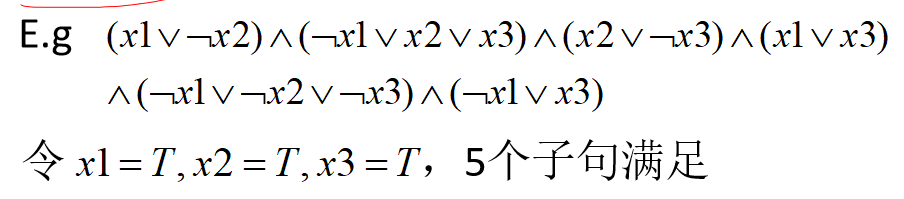
* 适用于表示过度约束（Over Constrained）问题。
* MaxSAT是SAT的优化版本，是NP难问题。


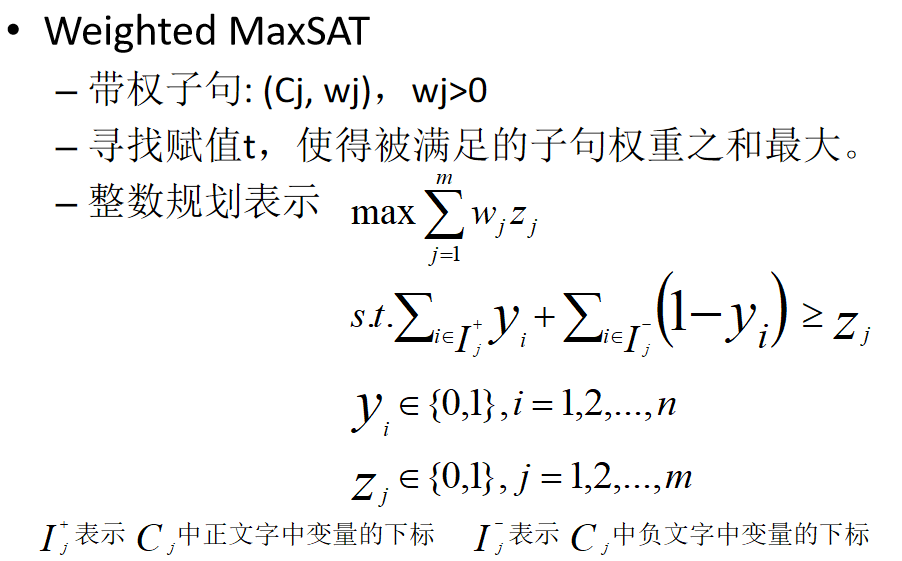

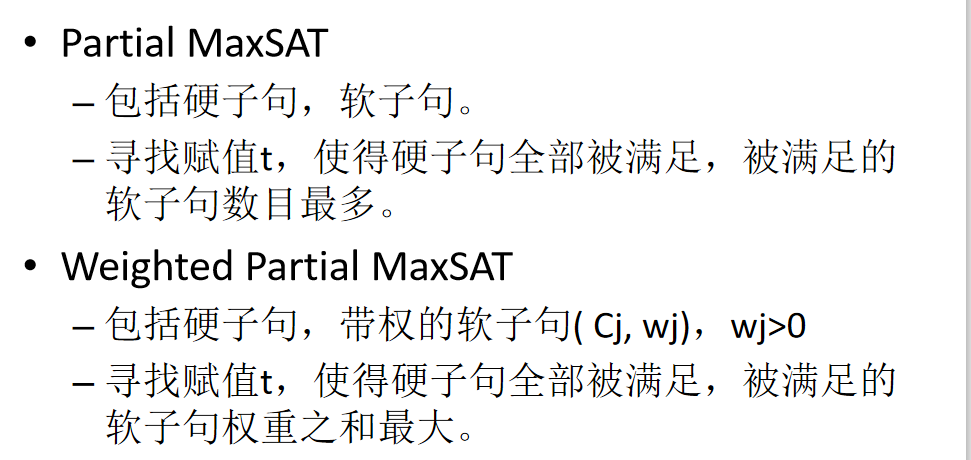

## 4 SMT可满足性模理论（SAT的扩展）Satisfiability Modulo Theories

判断带背景理论的逻辑共识的可满足性：
* 线性算术:  x+y>0∧y ≦ 3∨x-y=8
* 差分逻辑：x – y<7 ∨y-z<3
* 位向量: x[16] [15:0]= y[16] [15:0]<< w[8] [3:0]
* 矩阵: a0=a1∨ read(write(M, a0, v0) a1)=read(M,a1)
* 未解释的函数: x=y∧ f(x) != f(y)
* 理论的混合

应用领域：
* 电路设计与验证，程序分析
* 资源规划
* 调度问题
* 编译器优化
* 密码分析
* 机器学习


**是两个层次上的可满足性**
* 布尔逻辑层次上
* 理论层次上

* Φ=(((y+3x<1) →(30<y)) ∨(x ≤60)) ∧((30<y) → ﹁(x>3) ∧(x ≤60))
* PSΦ  =((b1 →b2  )∨ b4) ∧ (b2 → ﹁b3 ∧b4)   where:  b1 ≡ (y+3x<1), b2 ≡(30<y), b3 ≡(x>3), b4 ≡(x ≤60).
* 可行赋值 {¬b1, ¬b2, b3, ¬b4}

